In [14]:
%matplotlib inline
import numpy as np
from numpy import linalg as la
#ディガンマ関数のライブラリ
from scipy.special import digamma
from scipy import stats
from scipy.stats import multivariate_normal
import math
import matplotlib.pyplot as plt
#from numpy.random import *
import random

In [15]:
def dataset(mu,sigma,pi):
    for i in range(k):
        samplesB = np.random.multivariate_normal(mu[i],sigma[i],int(N*pi[i])).T
        if(i>=1):
            samplesA = np.column_stack((samplesA,samplesB))
        else:
            samplesA = samplesB
    sample = np.c_[samplesA[0],samplesA[1]]
    
    plt.scatter(sample[:,0],sample[:,1],color='g',marker='+',alpha=0.8)
    return sample

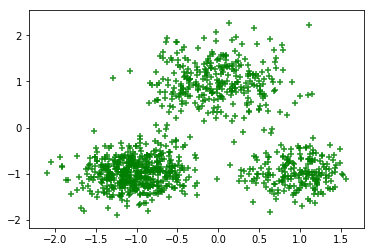

In [17]:
#初期設定
N = 1000 #データ数
#mu = [[-3,-3],[2,2]]
mu = [[0,1],[-1,-1],[1,-1],[3,1]]
sigma = [[[0.2,0.],[0.,0.2]],[[0.1,0.],[0.,0.1]],[[0.1,0.],[0.,0.1]],[[0.2,0.],[0.,0.2]]]
pi=[0.3,0.5,0.2,]
k=3 #データ群の個数
K=8 #分布の個数
D=2 #次元
samples = dataset(mu,sigma,pi)
plt.scatter(samples[:,0],samples[:,1],color='g',marker='+',alpha=0.2)

In [18]:
clus_center = []
for i in range(K):
    clus_center.append([random.uniform(-2,2),random.uniform(-2,2)])
print(clus_center)

[[0.5714706440669839, -0.7485399054293915], [-0.17492112483449151, 0.10771023848188266], [0.6417136875521434, 1.7691199172340384], [1.1375421987397125, 0.2395482067617376], [1.0041638582618972, -0.05753873498302031], [0.5374639853395671, -1.2332029564402442], [-1.5448744588655616, 1.8669905372353348], [1.279942248765939, -0.9340372678716888]]


In [19]:
class KMeans:
    def __init__(self):
        
        #クラスタの色
        self.color = ["r","b","c","m","y","g","k", '#f781bf']
        
        #二値指示変数
        self.r = [1,0]
        
        #クラスタ数
        self.k = K
        
        #データ数
        self.node = 300
        
    def cluster_center(self,mu2):
        
        #クラスター中心の初期値
        x = [mu2[i][0] for i in range(K)]
        y = [mu2[i][1] for i in range(K)]
        self.u = [x,y]
        
    def param_init(self):
        self.count = []
        self.sum = []
        self.t =[]
        self.clus = []
        self.b = []
        
    def figure_plot(self,sample,u,k,clus):
        X=sample[:,0]
        Y=sample[:,1]
        #新しい描画を開始
        plt.figure()
        plt.scatter(sample[:,0],sample[:,1],c=clus,s=20,marker='+',edgecolors='k',alpha=0.4)
        plt.scatter(u[0][0:k],u[1][0:k],c=self.color,s=100,marker="x",edgecolors='k')
        self.distance(sample,u,k)  
        
    def distance(self,sample,u,k):
        #変数の初期化
        self.param_init()
        X=sample[:,0]
        Y=sample[:,1]
        #配列の準備
        for i in range(0,k):
            self.b.append([u[0][i],u[1][i]])
            self.count.append(0)
            self.sum.append([0.0,0.0])
            self.t.append(0)
        self.sum = np.array(self.sum)
        
        for i,j in zip(X,Y):
            distance = []
            a = np.array([i, j])
            
            #各中心と各データの二乗距離
            for i in range(0,k):
                distance.append(np.linalg.norm(self.b[i] - a))
            
            #クラス分け
            self.clus.append(self.color[distance.index(min(distance))])
            self.count[distance.index(min(distance))] += 1
            self.sum[distance.index(min(distance))] += a
        
        #クラスタ中心の更新
        for i in range(0,k):
            self.t[i] = self.sum[i]/self.count[i]
        for i in range(0,2):
            for j in range(0,k):
                self.u[i][j] = self.t[j][i]

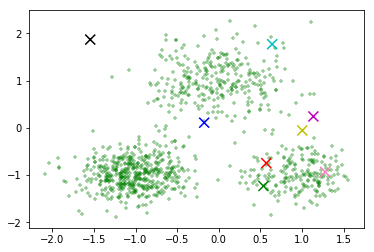

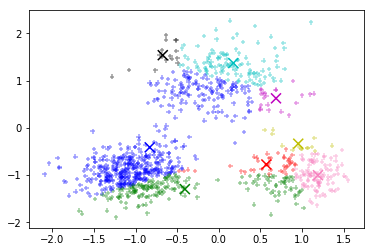

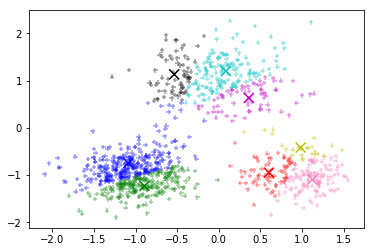

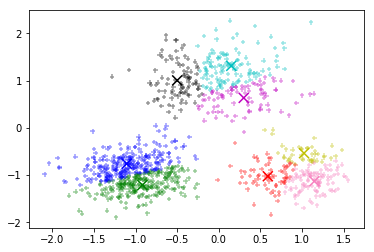

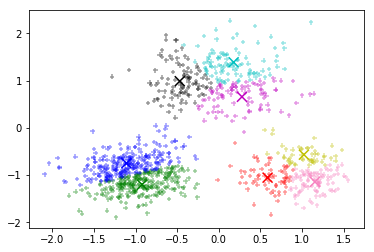

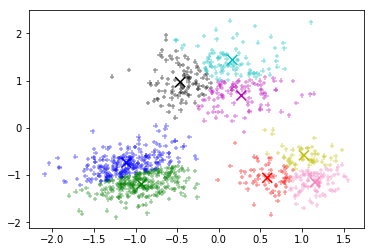

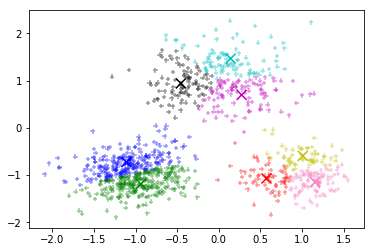

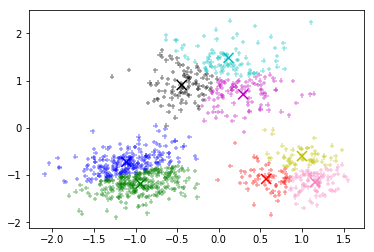

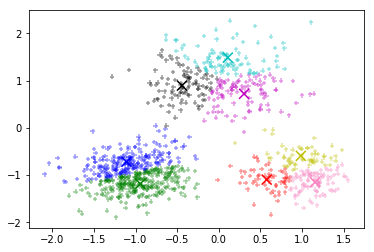

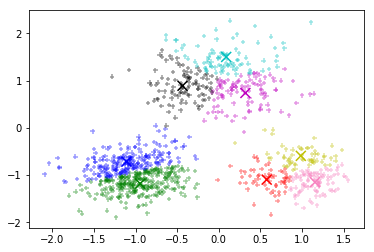

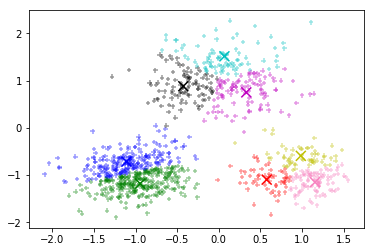

In [20]:
km = KMeans()
km.cluster_center(clus_center)
km.figure_plot(samples,km.u,km.k,km.color[5])
for i in range(10):
    km.figure_plot(samples,km.u,km.k,km.clus)
clus_center=[]
for i in range(K):
    clus_center.append([km.u[0][i],km.u[1][i]])

In [21]:
clus_center

[[0.57641161214831815, -1.0976122505215957],
 [-1.1091324067387291, -0.71630222537248167],
 [0.037980650281120625, 1.5228801124779392],
 [0.34130882857975803, 0.76893029978141103],
 [0.98689935122104899, -0.59433634869246654],
 [-0.94507194752972479, -1.1826779029357972],
 [-0.42145368643932513, 0.86044806761147974],
 [1.157227075904423, -1.1528265390216945]]

In [22]:
def make_gauss_model(mu,sigma):
    gauss = []
    for i in range(K):
        gauss.append(multivariate_normal(mean=mu[i],cov=sigma[i]))
        
    return gauss

In [23]:
def draw(gauss):
    plt.figure(figsize=(5, 5))
    # ガウス分布を等高線で描画
    x,y = np.meshgrid(np.linspace(min(samples[:,0]),max(samples[:,0]),1000),np.linspace(min(samples[:,1]),max(samples[:,1]),1000))
    pos = np.dstack((x,y))
    for i in range(K):
        z = gauss[i].pdf(pos)
        plt.contour(x, y, z,colors=clus[i],alpha=0.8)
    #plt.xlim(-5.1, 5.1)
    #plt.ylim(-5.1, 5.1)
    plt.scatter(samples[:,0],samples[:,1],color="g",marker='+',alpha=0.3)

In [24]:
def draw2(gauss,ganma):
    plt.figure(figsize=(5, 5))
    # ガウス分布を等高線で描画
    x,y = np.meshgrid(np.linspace(min(samples[:,0]),max(samples[:,0]),1000),np.linspace(min(samples[:,1]),max(samples[:,1]),1000))
    pos = np.dstack((x,y))
    for i in range(K):
        z = gauss[i].pdf(pos)
        if pi[i] > 0.01: 
            plt.contour(x, y, z,colors=clus[i],alpha=0.8)
    for i in range(N):
        #plt.xlim(min(samples[:,0])+0.1,max(samples[:,0])+0.1)
        #plt.ylim(min(samples[:,1])+0.1,max(samples[:,1])+0.1)
        plt.scatter(samples[i][0],samples[i][1],color="g",marker='+',alpha=0.3)

In [10]:
print(type(clus_center))

<class 'list'>


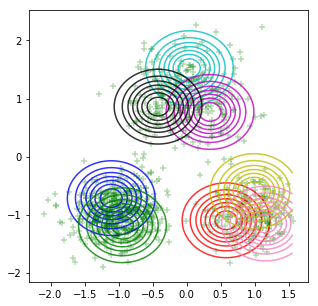

In [26]:
g_sigma = [[[0.1,0],[0,0.1]],
          [[0.1,0],[0,0.1]],
          [[0.1,0],[0,0.1]],
          [[0.1,0],[0,0.1]],
          [[0.1,0],[0,0.1]],
          [[0.1,0],[0,0.1]],
          [[0.1,0],[0,0.1]],
          [[0.1,0],[0,0.1]]]
pi = [1.0/K for i in range(K)]
clus = ["r","b","c","m","y","g","k", '#f781bf']
gauss = make_gauss_model(clus_center,g_sigma)
draw(gauss)

In [28]:
def ganma_cal():
    ganma = []
    for i in range(N):
        sum_p = 0.0
        p=[]
        for j in range(K):
            sum_p += pi[j]*gauss[j].pdf([samples[i][0],samples[i][1]])
        for j in range(K):
            p.append(pi[j]*gauss[j].pdf([samples[i][0],samples[i][1]])/sum_p)
        ganma.append(p)
    return ganma

In [30]:
def cal(ganma):
    N_k = []
    for k in range(K):
        sum_r = 0.0
        for n in range(N):
             sum_r += ganma[n][k]
        N_k.append(sum_r)
    return N_k

In [33]:
ganma = ganma_cal()
N_k = []
N_k = cal(ganma)
print(N_k)
mu = np.zeros((K,D))
S = np.zeros((K,D,D))

[63.370862906990638, 235.18097224066238, 88.096495576234389, 99.795155454471228, 64.161283951956463, 265.61220962852269, 104.47470495204679, 79.30831528911547]


In [35]:
def cal_3(N_k,ganma):
    #行列の初期化
    #mu = np.zeros((K,D))
    #S = np.zeros((K,D,D))
    for k in range(K):
        sum_r = 0.0
        sum_x = 0.0
        sum_y = 0.0
        for n in range(N):
            sum_r += ganma[n][k]*samples[n]
        mu[k] = sum_r/N_k[k]
        sigma = []
        sigma = [samples[j]-mu[k] for j in range(N)]
        tmp = np.zeros((1,D,D))
        for n in range(N):
            tmp += (ganma[n][k]*sigma[n])*sigma[n][:, np.newaxis]
        tmp2 = tmp/N_k[k]
        S[k] = tmp2
    return mu,S

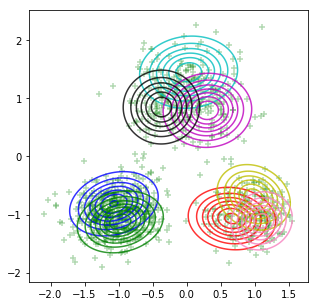

In [37]:
mu,S = cal_3(N_k,ganma)
gauss = make_gauss_model(mu,S)
draw2(gauss,ganma)

In [38]:
def M_step(N_k,mu,S):
    alpha_0 = 0.001
    beta_0 = 0.001
    nu_0 = 1.0
    m_0 = np.zeros((K,D))
    m = np.zeros((K,D))
    W_0 = np.identity(2)
    alpha=[]
    beta=[]
    nu=[]
    W = np.zeros((K,D,D))
    for k in range(K):
        alpha.append(alpha_0 + N_k[k])
        beta.append(beta_0 + N_k[k])
        nu.append(nu_0 + N_k[k])
        m[k] = (beta_0*m_0[k] + N_k[k]*mu[k])/beta[k]
    sigma = []
    sigma = [mu[j]-m_0[j] for j in range(K)]
    for k in range(K):
        tmp = beta_0*N_k[k]*sigma[k]*sigma[k][:, np.newaxis]/(beta_0 + N_k[k])
        tmp2 = la.inv(W_0)+N_k[k]*S[k]+tmp
        W[k] = la.inv(tmp2)
    return alpha,beta,nu,m,W

In [40]:
def E_step(alpha,beta,nu,m,W):
    E_ln_A = []
    E_ln_pi = []
    E_mu_A = []
    r = []
    for k in range(K):
        tmp = sum([digamma((nu[k]+1-i)/2)for i in range(1,D+1)])
        E = tmp +D*math.log(2)+math.log(la.norm(W[k]))
        E_ln_A.append(E)
        
        E = digamma(alpha[k])-digamma(sum(alpha))
        E_ln_pi.append(E)
    for n in range(N):
        tmp = [(D/beta[k])+nu[k]*np.dot((samples[n] - m[k]),np.dot(W[k],(samples[n] - m[k]).T)) for k in range(K)]
        E_mu_A.append(tmp)
    for n in range(N):
        tmp = [np.exp(np.array(E_ln_pi[k]) + np.array(E_ln_A[k])/2 - D*math.log(2*math.pi)/2-np.array(E_mu_A[n][k])/2) for k in range(K)]
        for k in range(K):
            if tmp[k] < 1e-10:
                tmp[k] = 1e-10
        tmp2 = np.array(tmp)/sum(tmp)
        
        r.append(tmp2)
    return E_ln_A,E_ln_pi,E_mu_A,r

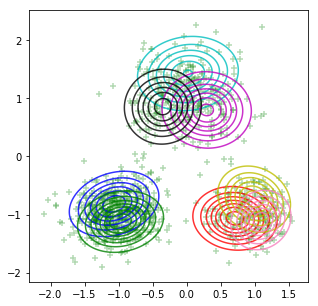

red,green,blue,yellow,cyan,magenta
[ 0.06290347  0.23479766  0.08764109  0.09934545  0.06369427  0.26524386
  0.10402728  0.07884863]


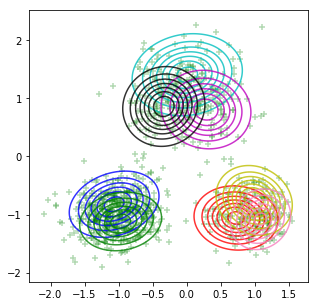

red,green,blue,yellow,cyan,magenta
[ 0.06156881  0.23468604  0.08775786  0.10052554  0.06157169  0.26756746
  0.10344116  0.07938318]


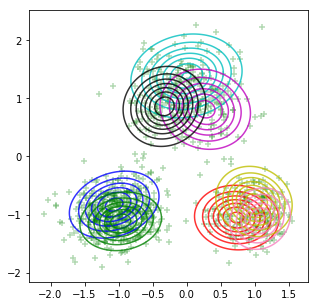

red,green,blue,yellow,cyan,magenta
[ 0.06158192  0.23641082  0.08865801  0.1016667   0.05970295  0.26630359
  0.10185183  0.08032594]


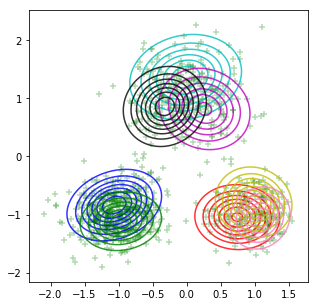

red,green,blue,yellow,cyan,magenta
[ 0.06164797  0.24029624  0.09033683  0.10317725  0.05730629  0.26254146
  0.09901118  0.08218455]


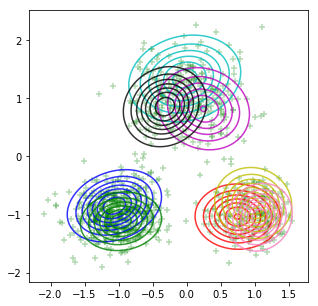

red,green,blue,yellow,cyan,magenta
[ 0.06164085  0.2468153   0.09302157  0.10523702  0.05396466  0.25606929
  0.09454375  0.08520936]


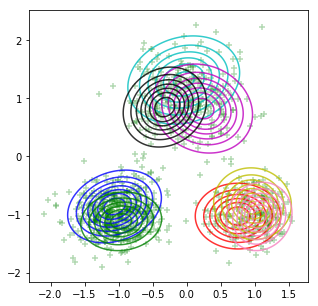

red,green,blue,yellow,cyan,magenta
[ 0.0614924   0.25677025  0.09705371  0.10798795  0.04931298  0.24614279
  0.08797683  0.08976492]


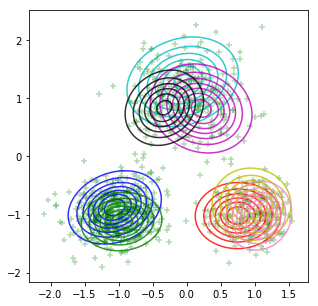

red,green,blue,yellow,cyan,magenta
[ 0.06103941  0.27136337  0.102892    0.11152695  0.04300507  0.23157358
  0.07876449  0.0963371 ]


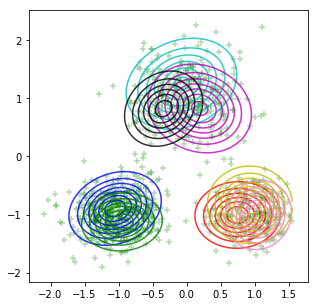

red,green,blue,yellow,cyan,magenta
[ 0.05994199  0.29223148  0.11109809  0.11580942  0.03484422  0.21072381
  0.06640352  0.1054497 ]


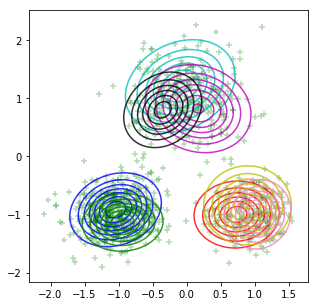

red,green,blue,yellow,cyan,magenta
[ 0.05759469  0.32128756  0.12222596  0.12042612  0.02511102  0.18166762
  0.05077251  0.11741736]


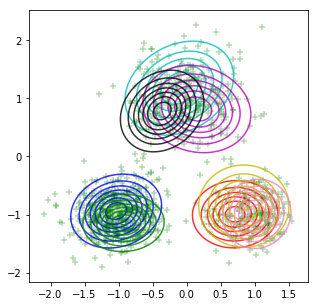

red,green,blue,yellow,cyan,magenta
[ 0.05312563  0.35989806  0.136458    0.12421471  0.01498972  0.14300897
  0.03289544  0.13191389]


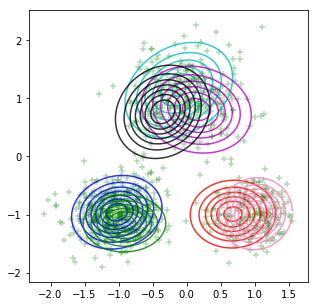

red,green,blue,yellow,cyan,magenta
[ 0.04568526  0.40650611  0.15289207  0.1249476   0.00650748  0.09625916
  0.01597784  0.14773404]


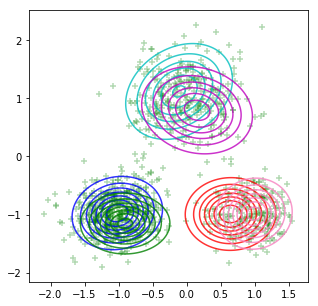

red,green,blue,yellow,cyan,magenta
[ 0.03504197  0.45288134  0.16946368  0.1201223   0.00137553  0.04963422
  0.00465436  0.16336559]


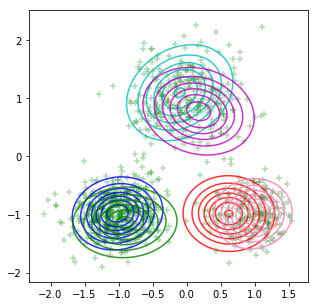

red,green,blue,yellow,cyan,magenta
[  2.22311004e-02   4.85538812e-01   1.85392181e-01   1.09094710e-01
   2.47355502e-08   1.67119672e-02   3.17016588e-04   1.77710952e-01]


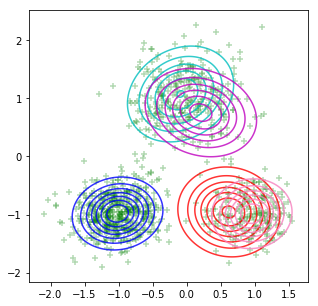

red,green,blue,yellow,cyan,magenta
[  1.01828430e-002   4.99218032e-001   2.02540228e-001   9.30177973e-002
   0.00000000e+000   2.81749073e-003   9.99150545e-124   1.89737363e-001]


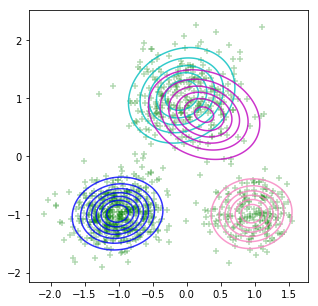

red,green,blue,yellow,cyan,magenta
[  2.49531547e-03   5.02073123e-01   2.22706622e-01   7.31097809e-02
   0.00000000e+00   7.16596992e-06   0.00000000e+00   1.97415278e-01]


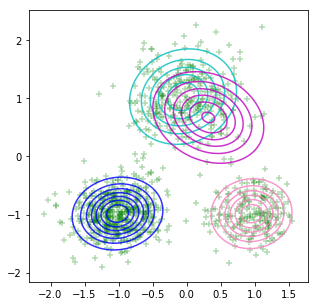

red,green,blue,yellow,cyan,magenta
[  1.75147057e-05   5.02021554e-01   2.45225874e-01   5.08070075e-02
   0.00000000e+00   0.00000000e+00   0.00000000e+00   2.00181900e-01]


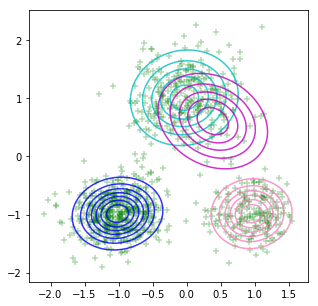

red,green,blue,yellow,cyan,magenta
[ 0.          0.50176218  0.26720656  0.02898754  0.          0.          0.
  0.20054081]


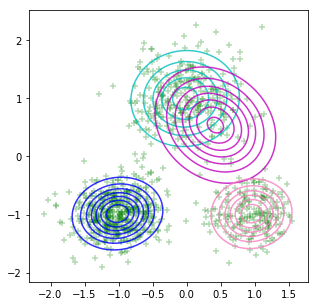

red,green,blue,yellow,cyan,magenta
[ 0.          0.5015403   0.28455198  0.01182905  0.          0.          0.
  0.20057786]


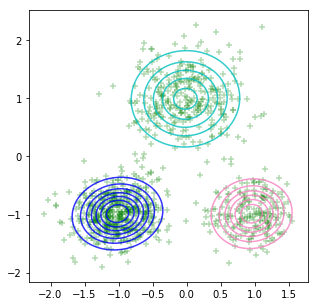

red,green,blue,yellow,cyan,magenta
[ 0.          0.50135553  0.29420287  0.00244618  0.          0.          0.
  0.20050783]


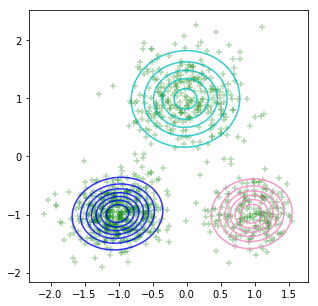

red,green,blue,yellow,cyan,magenta
[  0.00000000e+00   5.01215670e-01   2.97214318e-01   5.10262477e-06
   0.00000000e+00   0.00000000e+00   0.00000000e+00   2.00365406e-01]


In [41]:
for i in range(20):
    alpha,beta,nu,m,W = M_step(N_k,mu,S)
    E_ln_A,E_ln_pi,E_mu_A,ganma = E_step(alpha,beta,nu,m,W)
    pi = np.exp(E_ln_pi)
    N_k = cal(ganma)
    mu,S = cal_3(N_k,ganma)
    gauss = make_gauss_model(mu,S)
    draw2(gauss,ganma)
    #['r','g','b','y',"c", "m"]
    plt.show()
    print()
    print(pi)